In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
# Parámetros
img_size = (224, 224)
batch_size = 8

test_img_dir = "datos/train"

In [27]:
# Definir el generador de datos con aumentación

datagen_test = ImageDataGenerator(
   
    rescale=1.0/255,
    rotation_range=45,  # Rotación de hasta 45 grados, 90 grados en el segundo articulo
    width_shift_range=0.1,  # Desplazamiento horizontal del 10%
    height_shift_range=0.1,  # Desplazamiento vertical del 10%
    shear_range=0.1,  # Transformación de cizallamiento del 10%
    zoom_range=0.1,  # Zoom de hasta un 10%
    horizontal_flip=True,  # Volteo horizontal
    vertical_flip=True,  # Volteo vertical
    fill_mode='constant',  # Relleno con valores constantes
    brightness_range=[0.1, 1.0]  # Ajuste de brillo entre 0.1 y 1.0
)

# Cargar imágenes desde el directorio
test_generator = datagen_test.flow_from_directory(
    test_img_dir,
    target_size=img_size,
    batch_size=4,  # Tomamos una imagen por clase
    class_mode=None,  # No necesitamos etiquetas para esta prueba
    shuffle=True
)

Found 3200 images belonging to 4 classes.


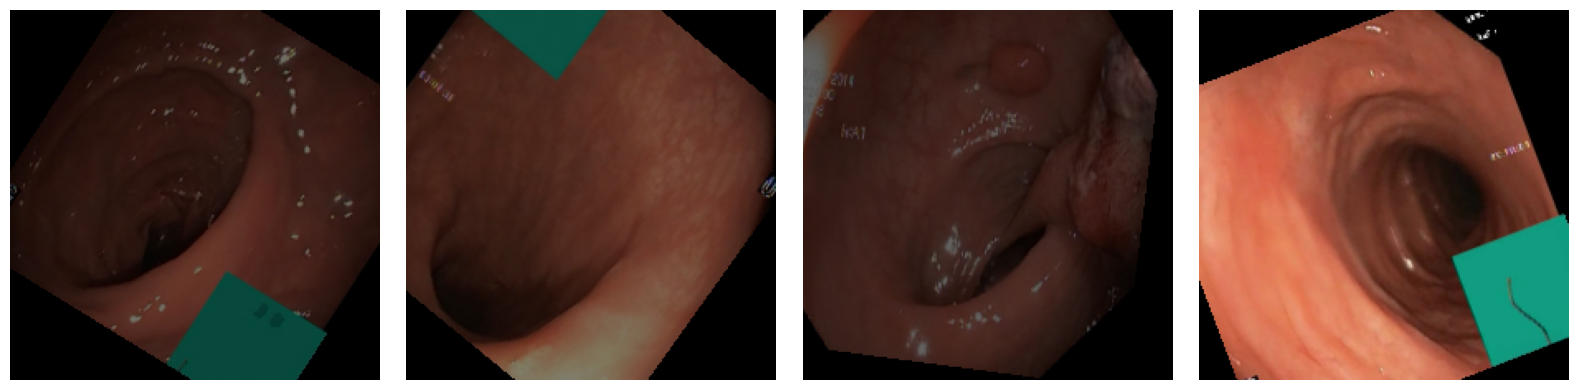

In [36]:
# Obtener un lote de imágenes transformadas
sample_images = next(test_generator)

# Visualizar un ejemplo de cada clase
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()

for img, ax in zip(sample_images, axes):
    ax.imshow(img)  # La normalización ya está en el rango [0,1] gracias a rescale
    ax.axis("off")

plt.tight_layout()
plt.show()